In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from EvolveAtm import Lake

In [2]:
# Initialize class
lc = Lake.LakeAfterImpact()

In [3]:
# now we need to load free parameters.
# Here is a list of them
print(lc.parameters.__doc__)

Set parameters used for the simulation.

        Parameters
        ----------
        T_surf : float
            Surface temperature of the atmosphere and temperature
            of the ocean (K).
        pH_ocean : float
            pH of the ocean (no units).
        T_lake : float
            Temperature of the small lake on land (K).
        pH_lake : float
            pH of the small lake (unit-less)
        Kzz : float, optional
            Eddy diffusion coefficient (cm2/s)
        HCNalt: float, optional
            Altitude HCN is produced in the atmosphere (cm)
        nz : integer, optional
            number of vertical layers in the atmosphere for HCN diffusion
            calculation
        T_trop : float, optional
            Tropopause temperature (K)
        P_trop: float, optional
            Tropopause pressure (K)
        vo : float, optional
            Turnover velocity of the ocean (cm/s)
        zs : float, optional
            Depth of the surface ocean (cm)


In [4]:
T_surf = 280 # surface and ocean temperature
pH_ocean = 7 # ocean pH
T_lake = 280 # lake temperature
pH_lake = 7 # lake pH

# There are most important parameters
lc.parameters(T_surf,pH_ocean,T_lake,pH_lake)

In [5]:
# initial conditions
init_dict = {'H2':1.5e+26, 
             'CO':9.2e+22, 
             'CO2':6.3e+25,
             'CH4':6.5e+24, 
             'N2':2.1e+25, 
             'NH3':0.0, 
             'HCN':0.0,
             'C2Hn':0.0, 
             'Haze':0.0,
             'HCONH2':0.0,
             'HCOOH':0.0}

yr = 60*60*24*365
tspan = [0,10e6*yr] # integrate for 10 million years

out = lc.integrate(tspan,init_dict)

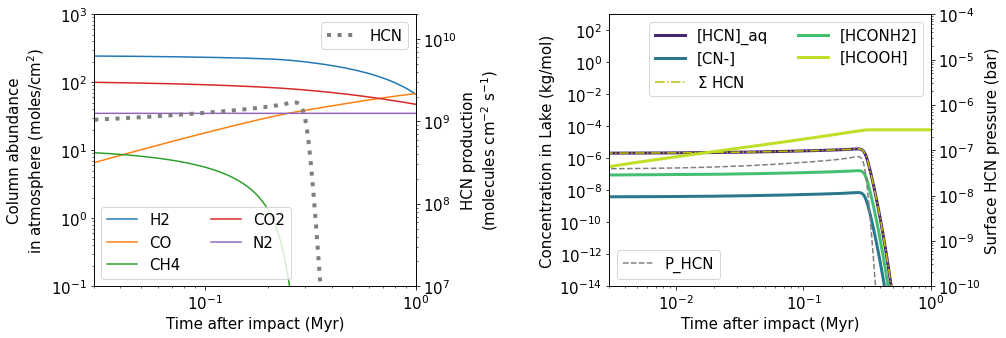

In [6]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[15,5])
spec = ['H2','CO','CH4','CO2','N2']
for sp in spec:
    ax.plot(out['time']/yr/1e6,out[sp]*out['Ntot']/6.022e23,'-',label=sp)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(.1,1000)
ax.set_xlim(.03,1e0)
ax.set_ylabel('Column abundance\nin atmosphere (moles/cm$^2$)')
ax.set_xlabel('Time after impact (Myr)')
ax.legend(ncol=2)

ax2 = ax.twinx()
ax2.set_ylabel('HCN production\n(molecules cm$\mathrm{^{-2}}$ s$\mathrm{^{-1}}$)')  # we already handled the x-label with ax1
ax2.plot(out['time']/yr/1e6, out['dNHCN_dt'],'C7:',lw=4,label='HCN')
ax2.set_yscale('log')
ax2.legend()
ax2.set_ylim(1e7,2e10)


# plot lake stuff
ax1.plot(out['time']/yr/1e6,out['HCN_aq_lake'],color=cm.viridis(0.1),label='[HCN]_aq',lw=3)
ax1.plot(out['time']/yr/1e6,out['CN_lake'],'-',color=cm.viridis(0.4),label='[CN-]',lw=3)
ax1.plot(out['time']/yr/1e6,out['sumHCN_lake'],color='y',label='$\Sigma$ HCN',lw=1.5,ls='-.')
ax1.plot(out['time']/yr/1e6,out['HCONH2_lake'],color=cm.viridis(0.7),label='[HCONH2]',lw=3)
ax1.plot(out['time']/yr/1e6,out['HCOOH_lake'],color=cm.viridis(0.9),label='[HCOOH]',lw=3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(.003,1e0)
ax1.set_ylim(1e-14,1e3)
ax1.set_ylabel('Concentration in Lake (kg/mol)')
ax1.set_xlabel('Time after impact (Myr)')
ax1.legend(ncol=2,loc=1)

ax3 = ax1.twinx()
ax3.plot(out['time']/yr/1e6,out['PHCN'],'C7--',label='P_HCN')
ax3.set_ylim(1e-10,1e-4)
ax3.set_yscale('log')
ax3.legend(ncol=2,loc=3)
ax3.set_ylabel('Surface HCN pressure (bar)')

plt.subplots_adjust(wspace=.6)

plt.show()